### 구글 드라이브에서 데이터 다운로드받기

In [1]:
!gdown https://drive.google.com/uc?id=1XmY-YspDty9UmQes_W1Lb0ohhobYqAQy -O municipalities.csv
!gdown https://drive.google.com/uc?id=1-0tMuexkIjxRExYsIfE6xCclf8NMG2YP -O df_delivery.csv
!gdown https://drive.google.com/uc?id=1C4PE5pPcLZSS06evHgpVrZUcbknO4rPI -O df.csv

Downloading...
From: https://drive.google.com/uc?id=1XmY-YspDty9UmQes_W1Lb0ohhobYqAQy
To: c:\Users\kd010\OneDrive\Documents\DS_study\머신러닝과제폴더\municipalities.csv

  0%|          | 0.00/41.1M [00:00<?, ?B/s]
  1%|▏         | 524k/41.1M [00:00<00:10, 3.84MB/s]
  8%|▊         | 3.15M/41.1M [00:00<00:02, 14.6MB/s]
 11%|█▏        | 4.72M/41.1M [00:00<00:02, 14.3MB/s]
 28%|██▊       | 11.5M/41.1M [00:00<00:00, 32.6MB/s]
 38%|███▊      | 15.7M/41.1M [00:00<00:00, 35.4MB/s]
 50%|████▉     | 20.4M/41.1M [00:00<00:00, 37.5MB/s]
 61%|██████▏   | 25.2M/41.1M [00:00<00:00, 39.1MB/s]
 72%|███████▏  | 29.4M/41.1M [00:00<00:00, 39.9MB/s]
 82%|████████▏ | 33.6M/41.1M [00:01<00:00, 38.5MB/s]
 92%|█████████▏| 37.7M/41.1M [00:01<00:00, 38.7MB/s]
100%|██████████| 41.1M/41.1M [00:01<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0tMuexkIjxRExYsIfE6xCclf8NMG2YP
To: c:\Users\kd010\OneDrive\Documents\DS_study\머신러닝과제폴더\df_delivery.csv

  0%|          | 0.00/79.8M [00:00<?, ?B/s]
  1%|    

### 패키지, 모듈 임포트

In [2]:
# from descartes import PolygonPatch
import geopandas as gpd # type: ignore
from shapely.geometry import Point, LineString, Polygon # type: ignore
import networkx as nx
# import osmnx as ox
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
import plotly.express as px

In [3]:
# edge_1 = gpd.read_file('brazil_PA_MT_graph.gpkg', layer = 'edges')
# node_1 = gpd.read_file('brazil_PA_MT_graph.gpkg', layer = 'nodes')
# edge_2 = gpd.read_file('Olist_road_Networdks_Updated_0320.gpkg', layer = 'edges')
# node_2 = gpd.read_file('Olist_road_Networdks_Updated_0320.gpkg', layer = 'nodes')
# edge_3 = gpd.read_file('BR_added_networks.gpkg', layer = 'edges')
# node_3 = gpd.read_file('BR_added_networks.gpkg', layer = 'nodes')
# edge_4 = gpd.read_file('brazil_road_networks.gpkg', layer = 'edges')
# node_4 = gpd.read_file('brazil_road_networks.gpkg', layer = 'nodes')
# edges = pd.concat([edge_1, edge_2, edge_3, edge_4], axis=0)
# edges.drop_duplicates(keep='first',inplace=True, ignore_index=True)
# nodes = pd.concat([node_1,node_2,node_3,node_4], axis=0)
# nodes.drop_duplicates(keep='first',inplace=True, ignore_index=True)

In [4]:
from pandas.core.frame import DataFrame
from shapely import wkt

df: DataFrame = pd.read_csv(filepath_or_buffer='df.csv',encoding='utf-8',index_col=0)
df_delivery: DataFrame = pd.read_csv(filepath_or_buffer='df_delivery.csv', encoding='utf-8',index_col=0)
municipalities: DataFrame = pd.read_csv(filepath_or_buffer='municipalities.csv',encoding='utf-8', index_col=0)

municipalities['geometry'] = municipalities['geometry'].apply(wkt.loads)

municipalities = gpd.GeoDataFrame(municipalities, geometry='geometry')

In [5]:
df_delivery.describe()

,price,freight_value,order_count,seller_zip_code_prefix,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,region_same,customer_city_lat,customer_city_lng,customer_code_muni,customer_code_state,customer_code_region,seller_code_muni,seller_code_state,seller_code_region,delivery_hours_IQR
count,98500.000000,98500.000000,98500.000000,98500.00000,98500.000000,98500.000000,98500.000000,98500.000000,98500.000000,98500.000000,...,98500.000000,98500.000000,98500.000000,9.850000e+04,98500.000000,98500.000000,9.850000e+04,98500.000000,98500.000000,98500.000000
mean,123.671066,20.104292,1.099959,24698.31400,-22.791535,-47.248796,48.889239,785.638183,2.232213,2088.468183,...,0.621929,-21.206045,-46.192461,3.519511e+06,34.962873,3.126751,3.588767e+06,35.584396,3.150528,290.055514
std,186.909946,15.820522,0.457448,27744.28646,2.743120,2.347896,9.983245,650.149607,1.736759,3734.662923,...,0.484908,5.545096,4.019648,6.493430e+05,6.504714,0.723002,3.583722e+05,3.628016,0.434587,227.505529
min,0.850000,0.000000,1.000000,1001.00000,-32.079231,-63.893565,5.000000,4.000000,1.000000,0.000000,...,0.000000,-33.690246,-69.261385,1.100015e+06,11.000000,1.000000,1.100122e+06,11.000000,1.000000,24.024722
25%,40.000000,13.150000,1.000000,6440.00000,-23.612642,-48.829744,43.000000,347.000000,1.000000,300.000000,...,0.000000,-23.571631,-48.002174,3.205309e+06,32.000000,3.000000,3.518800e+06,35.000000,3.000000,151.141875
50%,78.000000,16.350000,1.000000,13730.00000,-23.414512,-46.755690,52.000000,601.000000,2.000000,700.000000,...,1.000000,-22.922919,-46.632866,3.526654e+06,35.000000,3.000000,3.547809e+06,35.000000,3.000000,235.639722
75%,139.000000,21.220000,1.000000,29156.00000,-21.757321,-46.523244,57.000000,984.000000,3.000000,1800.000000,...,1.000000,-20.098472,-43.510838,3.550308e+06,35.000000,3.000000,3.550308e+06,35.000000,3.000000,361.916528
max,6735.000000,409.680000,20.000000,99730.00000,-2.500251,-34.855658,76.000000,3992.000000,20.000000,40425.000000,...,1.000000,3.842508,-34.826726,5.300108e+06,53.000000,5.000000,5.300108e+06,53.000000,5.000000,5004.023333


In [6]:
df.describe()

,price,freight_value,order_count,seller_zip_code_prefix,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,region_same,customer_city_lat,customer_city_lng,customer_code_muni,customer_code_state,customer_code_region,seller_code_muni,seller_code_state,seller_code_region,배송비견적에사용되는무게(kg)
count,98500.000000,98500.000000,98500.000000,98500.00000,98500.000000,98500.000000,98500.000000,98500.000000,98500.000000,98500.000000,...,98500.000000,98500.000000,98500.000000,9.850000e+04,98500.000000,98500.000000,9.850000e+04,98500.000000,98500.000000,98500.000000
mean,123.671066,20.104292,1.099959,24698.31400,-22.791535,-47.248796,48.889239,785.638183,2.232213,2088.468183,...,0.623117,-21.206045,-46.192461,3.519511e+06,34.962873,3.126751,3.588767e+06,35.584396,3.150528,2.759279
std,186.909946,15.820522,0.457448,27744.28646,2.743120,2.347896,9.983245,650.149607,1.736759,3734.662923,...,0.484608,5.545096,4.019648,6.493430e+05,6.504714,0.723002,3.583722e+05,3.628016,0.434587,4.372846
min,0.850000,0.000000,1.000000,1001.00000,-32.079231,-63.893565,5.000000,4.000000,1.000000,0.000000,...,0.000000,-33.690246,-69.261385,1.100015e+06,11.000000,1.000000,1.100122e+06,11.000000,1.000000,0.002000
25%,40.000000,13.150000,1.000000,6440.00000,-23.612642,-48.829744,43.000000,347.000000,1.000000,300.000000,...,0.000000,-23.571631,-48.002174,3.205309e+06,32.000000,3.000000,3.518800e+06,35.000000,3.000000,0.300000
50%,78.000000,16.350000,1.000000,13730.00000,-23.414512,-46.755690,52.000000,601.000000,2.000000,700.000000,...,1.000000,-22.922919,-46.632866,3.526654e+06,35.000000,3.000000,3.547809e+06,35.000000,3.000000,0.800000
75%,139.000000,21.220000,1.000000,29156.00000,-21.757321,-46.523244,57.000000,984.000000,3.000000,1800.000000,...,1.000000,-20.098472,-43.510838,3.550308e+06,35.000000,3.000000,3.550308e+06,35.000000,3.000000,3.412500
max,6735.000000,409.680000,20.000000,99730.00000,-2.500251,-34.855658,76.000000,3992.000000,20.000000,40425.000000,...,1.000000,3.842508,-34.826726,5.300108e+06,53.000000,5.000000,5.300108e+06,53.000000,5.000000,49.368000


In [7]:
# 지오메트리 컬럼 생성
geometry_customer = [Point(xy) for xy in zip(df['customer_lng'],df['customer_lat'])]
geometry_seller = [Point(xy) for xy in zip(df['seller_lng'],df['seller_lat'])]
# GeoDataFrame 생성
gdf_customer = gpd.GeoDataFrame(df, geometry=geometry_customer)
gdf_seller = gpd.GeoDataFrame(df, geometry=geometry_seller)
# 좌표계 설정 (예: WGS84)
gpd.crs = "EPSG:4674"



In [8]:
gdf_customer.rename(columns={'geometry':'geometry_customer'},inplace=True)
gdf_seller.rename(columns={'geometry': 'geometry_seller'},inplace=True)
gdf_customer['geometry_seller'] = gdf_seller['geometry_seller']
gdf_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,seller_code_muni,seller_name_muni,seller_code_state,seller_abbrev_state,seller_name_state,seller_code_region,seller_name_region,배송비견적에사용되는무게(kg),geometry_customer,geometry_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:17:58,...,3529401.0,Mauá,35.0,SP,São Paulo,3.0,Sudeste,0.500,POINT (-46.58718 -23.57682),POINT (-46.44432 -23.68070)
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,12 days 12:03:18,...,3106200.0,Belo Horizonte,31.0,MG,Minas Gerais,3.0,Sudeste,0.400,POINT (-44.66071 -12.17792),POINT (-43.98043 -19.80768)
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:11:06,...,3518602.0,Guariba,35.0,SP,São Paulo,3.0,Sudeste,0.420,POINT (-48.51411 -16.74477),POINT (-48.22960 -21.36350)
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 04:42:43,...,3106200.0,Belo Horizonte,31.0,MG,Minas Gerais,3.0,Sudeste,0.450,POINT (-35.27336 -5.77413),POINT (-43.92405 -19.83768)
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58,2 days 19:56:33,...,3530607.0,Mogi das Cruzes,35.0,SP,São Paulo,3.0,Sudeste,0.250,POINT (-46.51448 -23.67663),POINT (-46.26209 -23.54339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98495,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59,8 days 05:13:56,...,3507605.0,Bragança Paulista,35.0,SP,São Paulo,3.0,Sudeste,1.175,POINT (-45.88370 -23.17808),POINT (-46.52393 -22.96170)
98496,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04,22 days 04:27:19,...,3555000.0,Tupã,35.0,SP,São Paulo,3.0,Sudeste,4.950,POINT (-46.44986 -24.00150),POINT (-50.49822 -21.93070)
98497,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43,24 days 20:20:01,...,3550308.0,São Paulo,35.0,SP,São Paulo,3.0,Sudeste,13.300,POINT (-39.37365 -17.89794),POINT (-46.45200 -23.55322)
98498,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06,17 days 01:56:33,...,3130507.0,Ilicínea,31.0,MG,Minas Gerais,3.0,Sudeste,6.550,POINT (-42.69241 -22.56311),POINT (-45.82732 -20.94085)


In [9]:
municipalities

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.96836 -12.13407, -61.96827..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.18281 -10.13892, -63.18615..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.70518 -13.32474, -60.70904..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.34740 -11.50562, -61.34569..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.82417 -13.11156, -60.82289..."
...,...,...,...,...,...,...,...,...
5567,5222005.0,Vianópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.30928 -16.84149, -48.30293..."
5568,5222054.0,Vicentinópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.73218 -17.74154, -49.73386..."
5569,5222203.0,Vila Boa,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-47.07533 -15.06258, -47.07448..."
5570,5222302.0,Vila Propício,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.58701 -15.31582, -48.58952..."


In [10]:
# 'geometry_customer' 컬럼을 활성 지오메트리로 설정
# 'gdf_customer'의 현재 CRS가 없다면, 'EPSG:4674' (또는 적절한 CRS)로 설정

gdf_customer = gdf_customer.set_geometry('geometry_customer')
gdf_seller = gdf_seller.set_geometry('geometry_seller')
gdf_customer = gdf_customer.set_crs(epsg=4674,allow_override=True)
gdf_seller = gdf_seller.set_crs(epsg=4674,allow_override=True)

# 이제 공간 조인을 수행할 수 있습니다.
# 주의: 여기서 'municipalities'는 공간 조인을 수행할 다른 GeoDataFrame입니다.
# 'municipalities' GeoDataFrame도 유효한 지오메트리 컬럼과 CRS(좌표 참조 시스템)을 가지고 있는지 확인하세요.
municipalities = municipalities.set_geometry('geometry')

customer_geo_df = gpd.sjoin(gdf_customer, municipalities, how="left", predicate="within")
seller_geo_df = gpd.sjoin(gdf_seller, municipalities, how = 'left', predicate='within')


C:\Users\kd010\AppData\Local\Temp\ipykernel_35676\2359308657.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4674
Right CRS: None

  customer_geo_df = gpd.sjoin(gdf_customer, municipalities, how="left", predicate="within")
C:\Users\kd010\AppData\Local\Temp\ipykernel_35676\2359308657.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4674
Right CRS: None

  seller_geo_df = gpd.sjoin(gdf_seller, municipalities, how = 'left', predicate='within')


### 지도 시각화 함수 정의

In [11]:
# 지도시각화
# 지도 시각화함수
def plot_state_choropleth_map(data_frame=None, locations=None, geojson=None, color=None, hover_data=None, color_continuous_scale='Viridis', title='', height=600, width=700):
    '''
    state 별 choropleth 시각화 함수
    입력변수 : dataframe, locations, geojson
                color, color_continuous_scale, title
    '''
    fig = px.choropleth(data_frame=data_frame, locations=locations, geojson=geojson, color=color,
                        color_continuous_scale=color_continuous_scale, scope="south america",
                        hover_data=hover_data)  # 툴팁에 추가 정보 포함
    fig.update_layout(height=height, width=width,
                      title=title,
                      geo=dict(lonaxis=dict(range=[-33.0, -80.0]), lataxis=dict(range=[5.0, -35.0])))
    fig.show()

In [12]:
customer_geo_df = customer_geo_df[['code_muni','name_muni','code_state','abbrev_state','name_state','code_region','name_region']]
seller_geo_df = seller_geo_df[['code_muni','name_muni','code_state','abbrev_state','name_state','code_region','name_region']]

In [13]:
pd.set_option('display.max_columns',70)

In [14]:
customer_points = [Point(y,x) for x, y in zip(gdf_customer['customer_city_lat'], gdf_customer['customer_city_lng'])]
gdf_customer['geometry_cust_city'] = customer_points

### 주별 매출액, 판매량 상위 10개 카테고리 시각화

In [15]:
# 매출액 기준 상위 카테고리
top_revenue_categories = df.groupby(['customer_name_state', 'product_category_name'])['revenue'].sum().reset_index()
top_revenue_categories = top_revenue_categories.sort_values(by=['customer_name_state', 'revenue'], ascending=[True, False])
top_revenue_categories_top10 = top_revenue_categories.groupby('customer_name_state').head(10)

# 판매 갯수 기준 상위 카테고리
top_order_categories = df.groupby(['customer_name_state', 'product_category_name'])['order_count'].sum().reset_index()
top_order_categories = top_order_categories.sort_values(by=['customer_name_state', 'order_count'], ascending=[True, False])
top_order_categories_top10 = top_order_categories.groupby('customer_name_state').head(10)

# 매출액 기준 상위 카테고리 트리맵 시각화
fig1_treemap = px.treemap(top_revenue_categories_top10, path=['customer_name_state', 'product_category_name'], values='revenue',
                          title='주별 매출액 기준 상위 카테고리 (Top 10) - 트리맵')

# 판매 갯수 기준 상위 카테고리 버블 차트 시각화
fig2_bubble = px.scatter(top_order_categories_top10, y='product_category_name', x='customer_name_state', size='order_count', color='product_category_name',
                         title='주별 판매 갯수 기준 상위 카테고리 (Top 10) - 버블 차트',
                         size_max=60)
fig2_bubble.update_layout(xaxis_title='주', yaxis_title='카테고리')
fig1_treemap.show()
fig2_bubble.show()


### 셀러위치도 고려하여 군집화로 물류창고 위치 예측한 모델
#### 군집 갯수 정할 때 실루엣 계수를 사용함(높을수록 설명력 좋음)
#### 실루엣 계수(Silhouette Coefficient)는 클러스터링 알고리즘의 성능을 평가하는 데 사용되는 메트릭입니다. 이 지표는 클러스터 내의 데이터 포인트가 얼마나 잘 결합되어 있는지(응집력), 다른 클러스터와는 얼마나 멀리 떨어져 있는지(분리도)를 측정하여 클러스터링의 품질을 나타냅니다. 실루엣 계수의 값은 -1에서 1 사이이며, 높은 값은 클러스터 내의 데이터 포인트가 잘 모여 있고, 다른 클러스터와는 멀리 떨어져 있다는 것을 의미하여 클러스터링의 품질이 좋음을 나타냅니다.



In [16]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import seaborn as sns

# # 고객 수와 매출액에 따라 가중치 적용 (실제 비즈니스 모델에 따라 가중치 조정 가능)
# # 여기서는 단순화를 위해 모든 가중치를 1로 설정
# df_example['weighted_revenue'] = df_example['revenue'] * 1
# df_example['weighted_customer_count'] = df_example['customer_count'] * 1

# 각 지역별로 데이터 분리 (실제 분석 시에는 지역별 실제 데이터 사용)
df_north = df[df['customer_region'] == '북부']
df_central = df[df['customer_region'] == '중서부']
df_south = df[df['customer_region'] == '남부']
df_southeast = df[df['customer_region'] == '남동부']
df_northeast = df[df['customer_region'] == '북동부']

# 데이터 스케일링

def KMeans_for_regions(data):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(data[['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng', 'revenue', 'order_count', 'delivery_hours','delivery_distance_km']])

    # 최적 군집 수 결정
    silhouette_scores = []
    original_centers = []
    K_range = range(2, 11)
    best_kmeans_model = None
    best_silhouette_score = -1

    for K in K_range:
        kmeans_temp = KMeans(n_clusters=K, random_state=42, n_init = 'auto')
        cluster_labels = kmeans_temp.fit_predict(df_scaled)
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_kmeans_model = kmeans_temp

    # 실루엣 점수를 기반으로 최적의 군집 수 시각화
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.xlabel('군집수')
    plt.ylabel('실루엣 점수')
    plt.title('KMeans 군집화 결과')
    plt.show()

    print("각 군집의 중심 좌표 (물류창고 위치):")
    for idx, center in enumerate(best_kmeans_model.cluster_centers_):
        # 원본 데이터의 스케일을 반영하여 출력합니다. 여기서 center는 이미 1차원 배열이므로, 이를 [center]로 감싸서 2차원 배열로 만듭니다.
        original_center = scaler.inverse_transform([center])[0]  # [0]을 추가하여 첫 번째 샘플을 선택
        original_centers.append(original_center)
        print(f"군집 {idx+1}: 고객 위도={original_center[0]}, 고객 경도={original_center[1]}, 판매자 위도={original_center[2]}, 판매자 경도={original_center[3]}, 평균 수익={original_center[4]}, 평균 주문 수={original_center[5]}, 평균 배송 시간={original_center[6]}")

    return best_kmeans_model, original_centers
# # 추가 군집화 알고리즘: DBSCAN

# dbscan = DBSCAN(eps=0.5, min_samples=5)
# df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# # DBSCAN 군집화 결과 시각화
# sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=df, palette='viridis')
# plt.show()

# # 군집 결과를 DataFrame에 추가
# df['kmeans_cluster'] = kmeans_clusters
# df['dbscan_cluster'] = dbscan_clusters


  0%|          | 0/5 [00:00<?, ?it/s]

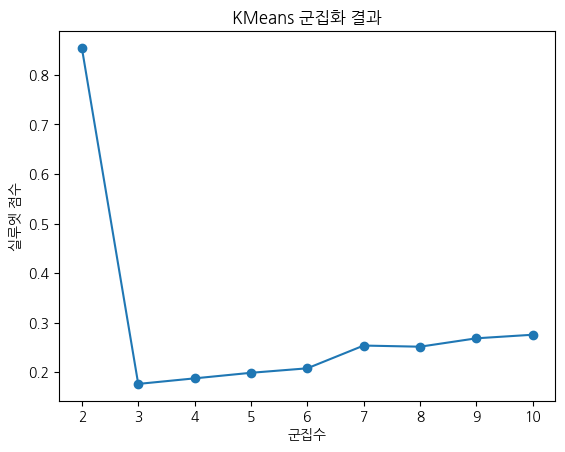

 20%|██        | 1/5 [00:04<00:16,  4.23s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-16.496292390583974, 고객 경도=-50.560675391959705, 판매자 위도=-22.510582949141238, 판매자 경도=-47.20058192376073, 평균 수익=144.17317016731934, 평균 주문 수=1.098433606265575, 평균 배송 시간=347.3678729579526
군집 2: 고객 위도=-17.25376743314354, 고객 경도=-50.07192089883121, 판매자 위도=-23.985421375033493, 판매자 경도=-47.248101587194434, 평균 수익=1046.995, 평균 주문 수=13.75, 평균 배송 시간=274.7863888888889


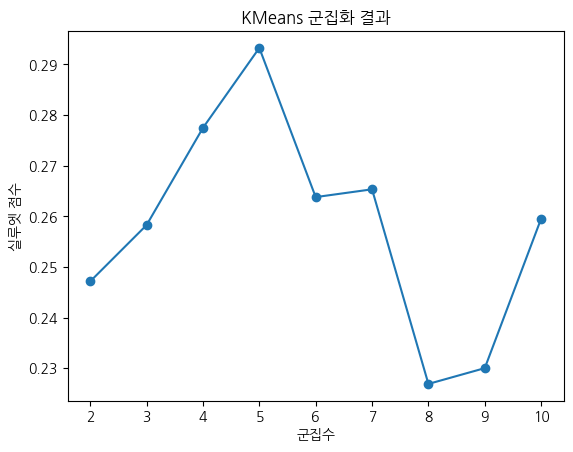

 40%|████      | 2/5 [00:04<00:06,  2.10s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-4.380194998810732, 고객 경도=-52.901359888818696, 판매자 위도=-8.302324226135593, 판매자 경도=-38.89405343442088, 평균 수익=417.1517777777778, 평균 주문 수=1.1333333333333333, 평균 배송 시간=628.8843024691358
군집 2: 고객 위도=-1.8537724351058618, 고객 경도=-51.01182318031724, 판매자 위도=-23.239683558164746, 판매자 경도=-47.12036964875404, 평균 수익=159.75437375745528, 평균 주문 수=1.0, 평균 배송 시간=586.5613154406892
군집 3: 고객 위도=-8.831578026561022, 고객 경도=-48.9815650062137, 판매자 위도=-22.29460558799264, 판매자 경도=-47.30609828124839, 평균 수익=155.84950261780102, 평균 주문 수=1.031413612565445, 평균 배송 시간=440.79368964514254
군집 4: 고객 위도=-10.027886227539323, 고객 경도=-64.03500452105159, 판매자 위도=-23.1596928006522, 판매자 경도=-47.29300173387807, 평균 수익=181.29335463258786, 평균 주문 수=1.038338658146965, 평균 배송 시간=460.2131434149805
군집 5: 고객 위도=-2.8553758400200744, 고객 경도=-52.120494561704824, 판매자 위도=-23.120465299831658, 판매자 경도=-47.37433077565614, 평균 수익=242.45784810126582, 평균 주문 수=2.607594936708861, 평균 배송 시간=515.0471729957806


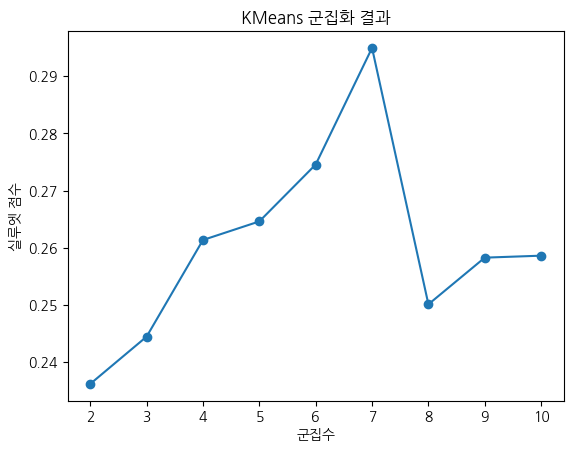

 60%|██████    | 3/5 [00:14<00:11,  5.75s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-8.322536481004569, 고객 경도=-37.575262982550406, 판매자 위도=-22.952833167443945, 판매자 경도=-47.81651024483226, 평균 수익=151.89110701107012, 평균 주문 수=1.018450184501845, 평균 배송 시간=1205.0713760762608
군집 2: 고객 위도=-6.941233106078542, 고객 경도=-36.52698054850958, 판매자 위도=-23.09136394812826, 판매자 경도=-47.211754071688176, 평균 수익=132.6931996461221, 평균 주문 수=1.0383367738130347, 평균 배송 시간=410.50533552868706
군집 3: 고객 위도=-8.88131363699594, 고객 경도=-38.80118165037209, 판매자 위도=-22.802031794488478, 판매자 경도=-46.80769794775391, 평균 수익=390.61672268907563, 평균 주문 수=3.8319327731092434, 평균 배송 시간=497.58096171802055
군집 4: 고객 위도=-12.825361181922347, 고객 경도=-39.341970658140326, 판매자 위도=-22.619249118806948, 판매자 경도=-46.89247712324154, 평균 수익=112.39901136014736, 평균 주문 수=1.0466687135400676, 평균 배송 시간=418.9418094360864
군집 5: 고객 위도=-8.406253926058712, 고객 경도=-38.25982461902238, 판매자 위도=-8.484866427424054, 판매자 경도=-38.49054398565358, 평균 수익=207.90764423076925, 평균 주문 수=1.0528846153846154, 평균 배송 시간=310.088265224359
군집 6: 

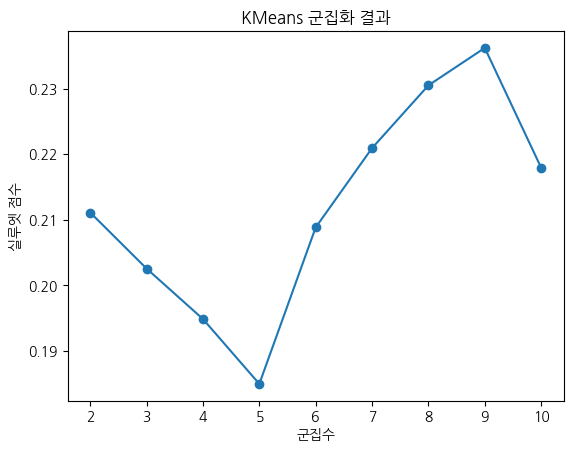

 80%|████████  | 4/5 [00:31<00:09,  9.87s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-28.45496596804159, 고객 경도=-50.82228432661361, 판매자 위도=-22.489727381989866, 판매자 경도=-47.43234006660948, 평균 수익=119.73845250800426, 평균 주문 수=1.0597652081109925, 평균 배송 시간=843.6800183801732
군집 2: 고객 위도=-29.193531549467895, 고객 경도=-52.06166745581101, 판매자 위도=-26.31920301569934, 판매자 경도=-50.663599823173726, 평균 수익=128.881974852071, 평균 주문 수=1.0591715976331362, 평균 배송 시간=257.5097700936884
군집 3: 고객 위도=-24.51629019476275, 고객 경도=-52.43098605309793, 판매자 위도=-22.897130847047077, 판매자 경도=-47.137451453342024, 평균 수익=106.45112364833098, 평균 주문 수=1.0545369064409968, 평균 배송 시간=301.3023763255498
군집 4: 고객 위도=-29.60449352290191, 고객 경도=-51.96661434728399, 판매자 위도=-22.577383141582235, 판매자 경도=-46.86068105933529, 평균 수익=106.32291964996023, 평균 주문 수=1.0575444179262792, 평균 배송 시간=318.8906477798403
군집 5: 고객 위도=-27.73611280158473, 고객 경도=-50.62000816596708, 판매자 위도=-7.014157513004324, 판매자 경도=-39.59033485807648, 평균 수익=292.968828125, 평균 주문 수=1.046875, 평균 배송 시간=434.1127712673611
군집 6: 고객 위도=-25.8781383

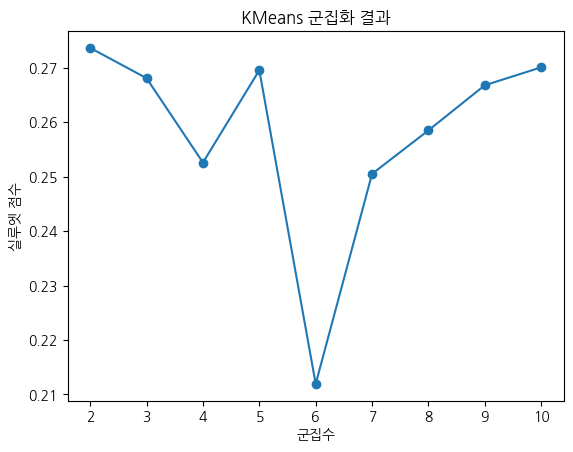

100%|██████████| 5/5 [06:33<00:00, 78.75s/it] 

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-21.256836583806795, 고객 경도=-43.52145779174513, 판매자 위도=-22.328060496721175, 판매자 경도=-47.23942129081267, 평균 수익=141.0102930871017, 평균 주문 수=1.094892617173008, 평균 배송 시간=351.6093115842459
군집 2: 고객 위도=-23.097795348885963, 고객 경도=-46.88969107452335, 판매자 위도=-23.06677921374642, 판매자 경도=-47.2623409172374, 평균 수익=117.19950763148216, 평균 주문 수=1.1031629275468922, 평균 배송 시간=189.7119233225041


[(KMeans(n_clusters=2, random_state=42),
  [array([-16.49629239, -50.56067539, -22.51058295, -47.20058192,
          144.17317017,   1.09843361, 347.36787296, 899.28223923]),
   array([ -17.25376743,  -50.0719209 ,  -23.98542138,  -47.24810159,
          1046.995     ,   13.75      ,  274.78638889,  837.01      ])]),
 (KMeans(n_clusters=5, random_state=42),
  [array([-4.38019500e+00, -5.29013599e+01, -8.30232423e+00, -3.88940534e+01,
           4.17151778e+02,  1.13333333e+00,  6.28884302e+02,  1.76014422e+03]),
   array([-1.85377244e+00, -5.10118232e+01, -2.32396836e+01, -4.71203696e+01,
           1.59754374e+02,  1.00000000e+00,  5.86561315e+02,  2.46760617e+03]),
   array([-8.83157803e+00, -4.89815650e+01, -2.22946056e+01, -4.73060983e+01,
           1.55849503e+02,  1.03141361e+00,  4.40793690e+02,  1.52972730e+03]),
   array([-1.00278862e+01, -6.40350045e+01, -2.31596928e+01, -4.72930017e+01,
           1.81293355e+02,  1.03833866e+00,  4.60213143e+02,  2.32318649e+03]),
   array

In [17]:
regions = [df_central,df_north,df_northeast,df_south,df_southeast]
results_kmeans = []
for region in tqdm(regions):
    temp_res = KMeans_for_regions(region)
    results_kmeans.append(temp_res)
results_kmeans

### 남동부 지역의 경우에는 넓은 지역을 2개의 장소로 커버하기 힘들다고 판단하여 실루엣 계수가 두번째로 높았던 5개의 군집으로 다시 모델 군집화함

In [18]:
def KMeans_num_k(data, k):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(data[['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng', 'revenue', 'order_count', 'delivery_hours','delivery_distance_km']])
    original_centers=[]
    # 최적 군집 수 결정


    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    cluster_labels = kmeans.fit_predict(df_scaled)


    # 실루엣 점수를 기반으로 최적의 군집 수 시각화

    print("각 군집의 중심 좌표 (물류창고 위치):")
    for idx, center in enumerate(kmeans.cluster_centers_):
        # 원본 데이터의 스케일을 반영하여 출력합니다. 여기서 center는 이미 1차원 배열이므로, 이를 [center]로 감싸서 2차원 배열로 만듭니다.
        original_center = scaler.inverse_transform([center])[0]  # [0]을 추가하여 첫 번째 샘플을 선택
        original_centers.append(original_center)
        print(f"군집 {idx+1}: 고객 위도={original_center[0]}, 고객 경도={original_center[1]}, 판매자 위도={original_center[2]}, 판매자 경도={original_center[3]}, 평균 수익={original_center[4]}, 평균 주문 수={original_center[5]}, 평균 배송 시간={original_center[6]}")

    return kmeans, original_centers

In [19]:
results_kmeans[4] = KMeans_num_k(df_southeast, 5)

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-22.719865509180487, 고객 경도=-43.768235592694964, 판매자 위도=-22.249849822881146, 판매자 경도=-46.831363061576695, 평균 수익=151.9210418298606, 평균 주문 수=1.1345762180792724, 평균 배송 시간=425.0829608595749
군집 2: 고객 위도=-23.116067345616212, 고객 경도=-46.98359849166926, 판매자 위도=-22.754814577031183, 판매자 경도=-46.83704427161835, 평균 수익=107.45792928577505, 평균 주문 수=1.0946256055755446, 평균 배송 시간=167.93932920015226
군집 3: 고객 위도=-22.32167225953677, 고객 경도=-45.23403779375496, 판매자 위도=-8.093234712317589, 판매자 경도=-39.12775260392469, 평균 수익=315.3158928571429, 평균 주문 수=1.0790816326530612, 평균 배송 시간=316.78638959750566
군집 4: 고객 위도=-19.61624586056442, 고객 경도=-43.50817507175299, 판매자 위도=-22.598220076461523, 판매자 경도=-47.00117383863586, 평균 수익=117.33934256381275, 평균 주문 수=1.0844871432608083, 평균 배송 시간=269.0940931472586
군집 5: 고객 위도=-22.747389083383688, 고객 경도=-45.92854719509693, 판매자 위도=-25.504869378740075, 판매자 경도=-50.769736976942454, 평균 수익=155.92843354621036, 평균 주문 수=1.0931437522593086, 평균 배송 시간=279.93995715681945


In [20]:
from joblib import dump

# 모델 또는 데이터를 저장할 객체
model_kmean = [a[0] for a in results_kmeans]
regions_name = ['중서부','북부','북동부','남부','남동부']
# 객체를 파일로 저장
for i,m in zip(regions_name,model_kmean):
    dump(m, f'model_with_seller_kmeans{i}.joblib')


In [21]:
result_kmeans_with_seller = {r:i[1] for r,i in zip(regions_name,results_kmeans)}

In [22]:
def visualize_clusters_px_modified(center_array):
    # 모든 군집 중심을 담을 빈 DataFrame을 생성합니다.
    df_all_centers = pd.DataFrame()
    for idx, centers in center_array.items():
        # 각 모델의 군집 중심을 DataFrame으로 변환합니다.
        # 여기서는 cluster_centers_ 속성에서 군집 중심을 추출합니다.
        df_centers = pd.DataFrame(centers, columns=['customer_lat', 'customer_lon', 'seller_lat', 'seller_lon', 'revenue', 'order_count', 'delivery_hours', 'delivery_distance_km'])
        df_centers['cluster'] = [f'{idx}지역 - {i+1}번 군집' for i in range(len(centers))]
        df_centers['center_lat'] = (df_centers['customer_lat'] + df_centers['seller_lat'])/2
        df_centers['center_lon'] = (df_centers['customer_lon'] + df_centers['seller_lon'])/2

        # 모든 중심을 하나의 DataFrame에 추가합니다.
        df_all_centers = pd.concat([df_all_centers, df_centers], axis=0, ignore_index=True)
    df_all_centers = df_all_centers.reset_index(drop=True)
    # 시각화
    fig = px.scatter_mapbox(df_all_centers,
                            lat="center_lat",
                            lon="center_lon",
                            color="delivery_distance_km",
                            hover_data=["center_lon", "center_lon", "order_count", "delivery_hours", "delivery_distance_km"],
                            zoom=3,
                            size='delivery_distance_km',
                            mapbox_style="open-street-map",
                            title="셀러 위치도 고려한 군집별 물류창고 위치 예측")
    fig.update_layout(height=1000)

    fig.show()
    return df_all_centers

visualize_clusters_px_modified(result_kmeans_with_seller)


,customer_lat,customer_lon,seller_lat,seller_lon,revenue,order_count,delivery_hours,delivery_distance_km,cluster,center_lat,center_lon
0,-16.496292,-50.560675,-22.510583,-47.200582,144.173170,1.098434,347.367873,899.282239,중서부지역 - 1번 군집,-19.503438,-48.880629
1,-17.253767,-50.071921,-23.985421,-47.248102,1046.995000,13.750000,274.786389,837.010000,중서부지역 - 2번 군집,-20.619594,-48.660011
2,-4.380195,-52.901360,-8.302324,-38.894053,417.151778,1.133333,628.884302,1760.144222,북부지역 - 1번 군집,-6.341260,-45.897707
3,-1.853772,-51.011823,-23.239684,-47.120370,159.754374,1.000000,586.561315,2467.606173,북부지역 - 2번 군집,-12.546728,-49.066096
4,-8.831578,-48.981565,-22.294606,-47.306098,155.849503,1.031414,440.793690,1529.727304,북부지역 - 3번 군집,-15.563092,-48.143832
5,-10.027886,-64.035005,-23.159693,-47.293002,181.293355,1.038339,460.213143,2323.186486,북부지역 - 4번 군집,-16.593790,-55.664003
6,-2.855376,-52.120495,-23.120465,-47.374331,242.457848,2.607595,515.047173,2395.067848,북부지역 - 5번 군집,-12.987921,-49.747413
7,-8.322536,-37.575263,-22.952833,-47.816510,151.891107,1.018450,1205.071376,2001.965111,북동부지역 - 1번 군집,-15.637685,-42.695887
8,-6.941233,-36.526981,-23.091364,-47.211754,132.693200,1.038337,410.505336,2149.295361,북동부지역 - 2번 군집,-15.016299,-41.869367
9,-8.881314,-38.801182,-22.802032,-46.807698,390.616723,3.831933,497.580962,1819.368655,북동부지역 - 3번 군집,-15.841673,-42.804440


### 셀러 위치 고려하지 않은 군집화 모델

In [23]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import seaborn as sns

# # 고객 수와 매출액에 따라 가중치 적용 (실제 비즈니스 모델에 따라 가중치 조정 가능)
# # 여기서는 단순화를 위해 모든 가중치를 1로 설정
# df_example['weighted_revenue'] = df_example['revenue'] * 1
# df_example['weighted_customer_count'] = df_example['customer_count'] * 1

# 각 지역별로 데이터 분리 (실제 분석 시에는 지역별 실제 데이터 사용)
df_north = df[df['customer_region'] == '북부']
df_central = df[df['customer_region'] == '중서부']
df_south = df[df['customer_region'] == '남부']
df_southeast = df[df['customer_region'] == '남동부']
df_northeast = df[df['customer_region'] == '북동부']

# 데이터 스케일링

def KMeans_for_regions_without_seller_loc(data):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(data[['customer_lat', 'customer_lng', 'revenue', 'order_count', 'delivery_hours','delivery_distance_km']])

    # 최적 군집 수 결정
    silhouette_scores = []
    original_centers = []
    K_range = range(2, 11)
    best_kmeans_model = None
    best_silhouette_score = -1

    for K in K_range:
        kmeans_temp = KMeans(n_clusters=K, random_state=42,n_init='auto')
        cluster_labels = kmeans_temp.fit_predict(df_scaled)
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_kmeans_model = kmeans_temp

    # 실루엣 점수를 기반으로 최적의 군집 수 시각화
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.xlabel('군집수')
    plt.ylabel('실루엣 점수')
    plt.title('KMeans 군집화 결과')
    plt.show()

    print("각 군집의 중심 좌표 (물류창고 위치):")
    for idx, center in enumerate(best_kmeans_model.cluster_centers_):
        # 원본 데이터의 스케일을 반영하여 출력합니다. 여기서 center는 이미 1차원 배열이므로, 이를 [center]로 감싸서 2차원 배열로 만듭니다.
        original_center = scaler.inverse_transform([center])[0]  # [0]을 추가하여 첫 번째 샘플을 선택
        original_centers.append(original_center)
        print(f"군집 {idx+1}: 고객 위도={original_center[0]}, 고객 경도={original_center[1]}, 평균 수익={original_center[2]}, 평균 주문 수={original_center[3]}, 평균 배송 시간={original_center[4]}, 평균 배송 거리={original_center[5]}")

    return best_kmeans_model, original_centers
# # 추가 군집화 알고리즘: DBSCAN

# dbscan = DBSCAN(eps=0.5, min_samples=5)
# df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# # DBSCAN 군집화 결과 시각화
# sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', data=df, palette='viridis')
# plt.show()

# # 군집 결과를 DataFrame에 추가
# df['kmeans_cluster'] = kmeans_clusters
# df['dbscan_cluster'] = dbscan_clusters


  0%|          | 0/5 [00:00<?, ?it/s]

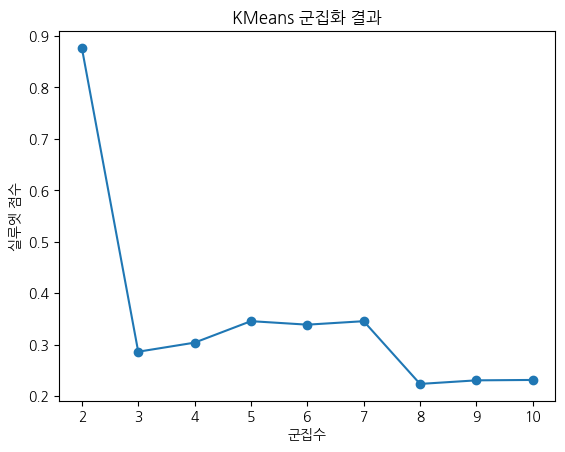

 20%|██        | 1/5 [00:03<00:15,  3.95s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-16.496292390583974, 고객 경도=-50.560675391959705, 평균 수익=144.17317016731934, 평균 주문 수=1.098433606265575, 평균 배송 시간=347.3678729579526, 평균 배송 거리=899.282239231043
군집 2: 고객 위도=-17.25376743314354, 고객 경도=-50.07192089883121, 평균 수익=1046.9950000000001, 평균 주문 수=13.75, 평균 배송 시간=274.7863888888889, 평균 배송 거리=837.01


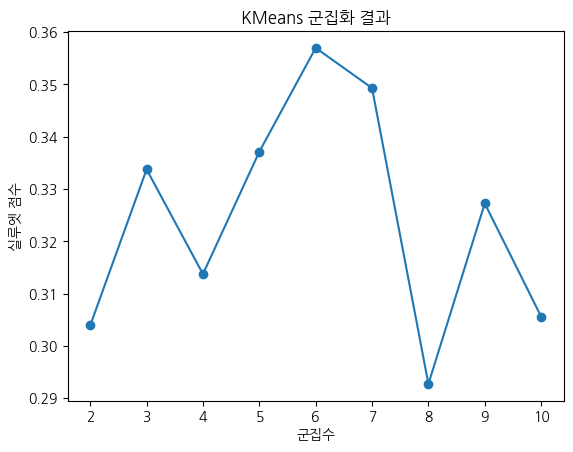

 40%|████      | 2/5 [00:04<00:05,  1.94s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-1.6680293348087813, 고객 경도=-49.06724939342519, 평균 수익=128.02160220994477, 평균 주문 수=1.0497237569060773, 평균 배송 시간=453.21249232658073, 평균 배송 거리=2396.0382044198896
군집 2: 고객 위도=-2.1383804246805647, 고객 경도=-55.10223953505165, 평균 수익=121.18595818815331, 평균 주문 수=1.0278745644599303, 평균 배송 시간=949.3422086720867, 평균 배송 거리=2564.841707317073
군집 3: 고객 위도=-9.407584886551199, 고객 경도=-63.64857302458645, 평균 수익=138.20538461538462, 평균 주문 수=1.0355029585798816, 평균 배송 시간=437.22440006574624, 평균 배송 거리=2355.161834319527
군집 4: 고객 위도=-8.953260103520929, 고객 경도=-48.99258760763761, 평균 수익=131.22779569892472, 평균 주문 수=1.0483870967741935, 평균 배송 시간=442.8460924432497, 평균 배송 거리=1500.8106720430105
군집 5: 고객 위도=-4.41797943941841, 고객 경도=-53.28702439711161, 평균 수익=305.02612903225804, 평균 주문 수=3.612903225806452, 평균 배송 시간=541.5464068100358, 평균 배송 거리=2279.3687096774192
군집 6: 고객 위도=-4.5379109358868845, 고객 경도=-52.609579399615356, 평균 수익=1129.6472602739725, 평균 주문 수=1.0273972602739727, 평균 배송 시간=569.9111834094

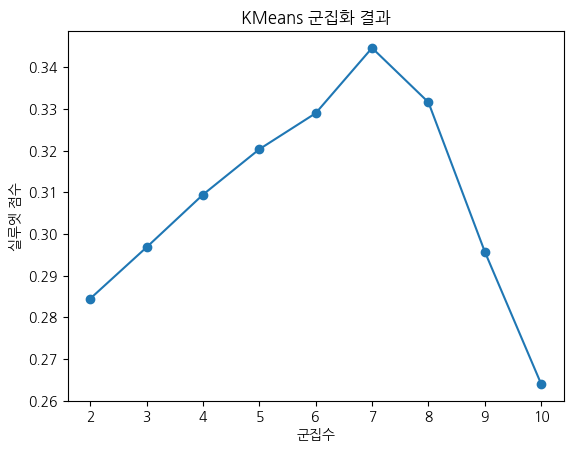

 60%|██████    | 3/5 [00:14<00:10,  5.43s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-8.25615092068567, 고객 경도=-37.60665247610085, 평균 수익=147.47587476979743, 평균 주문 수=1.0055248618784531, 평균 배송 시간=1207.5048102107633, 평균 배송 거리=1975.131749539595
군집 2: 고객 위도=-6.944225583469665, 고객 경도=-36.51582907515271, 평균 수익=131.10663302752295, 평균 주문 수=1.0, 평균 배송 시간=411.05719410465514, 평균 배송 거리=2146.237908256881
군집 3: 고객 위도=-8.68996550913162, 고객 경도=-39.090426791478905, 평균 수익=564.3117460317461, 평균 주문 수=4.587301587301588, 평균 배송 시간=503.11840828924164, 평균 배송 거리=1835.9060317460317
군집 4: 고객 위도=-12.432158249452552, 고객 경도=-39.20052517446837, 평균 수익=115.29862219632972, 평균 주문 수=0.9999999999999999, 평균 배송 시간=404.2005036896786, 평균 배송 거리=1291.133906204486
군집 5: 고객 위도=-4.227201439686634, 고객 경도=-43.43789263944694, 평균 수익=134.99215748031497, 평균 주문 수=1.0204724409448818, 평균 배송 시간=462.05576640419946, 평균 배송 거리=2120.308346456693
군집 6: 고객 위도=-9.569763991610513, 고객 경도=-38.39268029344933, 평균 수익=186.573631713555, 평균 주문 수=2.1508951406649617, 평균 배송 시간=441.90577791986357, 평균 배송 거리=1716.9

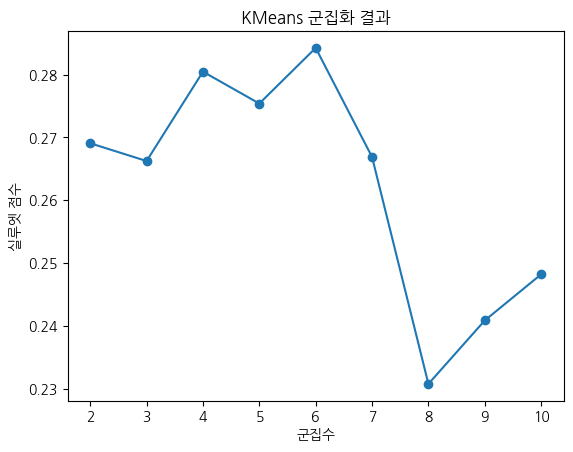

 80%|████████  | 4/5 [00:28<00:09,  9.11s/it]

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-28.344425912200588, 고객 경도=-50.727569540125124, 평균 수익=118.77293900184843, 평균 주문 수=1.0499075785582255, 평균 배송 시간=815.1184984082975, 평균 배송 거리=803.0561090573012
군집 2: 고객 위도=-26.46148284835552, 고객 경도=-49.29715970430931, 평균 수익=108.4489305699482, 평균 주문 수=1.0002072538860107, 평균 배송 시간=254.48258157743234, 평균 배송 거리=422.3038777202072
군집 3: 고객 위도=-24.690223704168197, 고객 경도=-52.395378362789316, 평균 수익=108.90918258212375, 평균 주문 수=1.0244461420932005, 평균 배송 시간=286.13305481283425, 평균 배송 거리=562.9407715813599
군집 4: 고객 위도=-27.232131987347696, 고객 경도=-50.839569219218255, 평균 수익=1226.8909361702126, 평균 주문 수=1.0808510638297872, 평균 배송 시간=305.33949527186763, 평균 배송 거리=689.009829787234
군집 5: 고객 위도=-29.621248101114332, 고객 경도=-51.95538504679963, 평균 수익=107.80591364344536, 평균 주문 수=1.0251502336968623, 평균 배송 시간=313.08251384870294, 평균 배송 거리=935.5933474293347
군집 6: 고객 위도=-27.18062259415296, 고객 경도=-50.51610339622453, 평균 수익=198.73246706586826, 평균 주문 수=2.5796407185628745, 평균 배송 시간=283.35132268

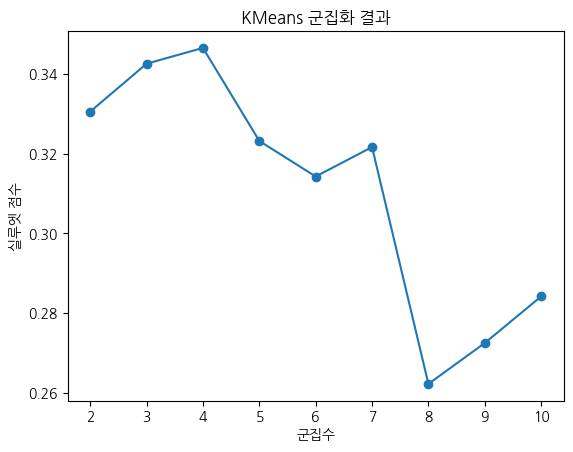

100%|██████████| 5/5 [06:13<00:00, 74.78s/it] 

각 군집의 중심 좌표 (물류창고 위치):
군집 1: 고객 위도=-22.531778784037012, 고객 경도=-44.39988109915132, 평균 수익=169.08834482758618, 평균 주문 수=1.051939655172414, 평균 배송 시간=768.6328676364943, 평균 배송 거리=479.7280215517241
군집 2: 고객 위도=-23.1112074174025, 고객 경도=-46.94155493146001, 평균 수익=113.82031337437049, 평균 주문 수=1.0548161845210613, 평균 배송 시간=180.58973215033956, 평균 배송 거리=221.28006642174157
군집 3: 고객 위도=-21.09159689084025, 고객 경도=-43.49031580753438, 평균 수익=127.2524170457266, 평균 주문 수=1.0541058175724194, 평균 배송 시간=264.77129497512834, 평균 배송 거리=609.4610610485997
군집 4: 고객 위도=-22.4950719953504, 고객 경도=-45.75252585545568, 평균 수익=350.9681002638522, 평균 주문 수=3.7845206684256762, 평균 배송 시간=232.44874181569432, 평균 배송 거리=344.62427440633246


In [24]:
regions = [df_central,df_north,df_northeast,df_south,df_southeast]
results_kmeans_without_seller_loc = []
for region in tqdm(regions):
    temp_res = KMeans_for_regions_without_seller_loc(region)
    results_kmeans_without_seller_loc.append(temp_res)
results_kmeans_without_seller_loc
from joblib import dump

# 모델 또는 데이터를 저장할 객체
model_kmean = [a[0] for a in results_kmeans_without_seller_loc]
regions_name = ['중서부','북부','북동부','남부','남동부']
# 객체를 파일로 저장
for i,m in zip(regions_name,model_kmean):
    dump(m, f'model_without_seller_kmeans{i}.joblib')

In [26]:
regions_name = ['중서부','북부','북동부','남부','남동부']

results_kmeans_without_seller_loc_geo = {r:v[1] for r, v in zip(regions_name, results_kmeans_without_seller_loc)}
results_kmeans_without_seller_loc_geo

{'중서부': [array([-16.49629239, -50.56067539, 144.17317017,   1.09843361,
         347.36787296, 899.28223923]),
  array([ -17.25376743,  -50.0719209 , 1046.995     ,   13.75      ,
          274.78638889,  837.01      ])],
 '북부': [array([-1.66802933e+00, -4.90672494e+01,  1.28021602e+02,  1.04972376e+00,
          4.53212492e+02,  2.39603820e+03]),
  array([-2.13838042e+00, -5.51022395e+01,  1.21185958e+02,  1.02787456e+00,
          9.49342209e+02,  2.56484171e+03]),
  array([-9.40758489e+00, -6.36485730e+01,  1.38205385e+02,  1.03550296e+00,
          4.37224400e+02,  2.35516183e+03]),
  array([-8.95326010e+00, -4.89925876e+01,  1.31227796e+02,  1.04838710e+00,
          4.42846092e+02,  1.50081067e+03]),
  array([  -4.41797944,  -53.2870244 ,  305.02612903,    3.61290323,
          541.54640681, 2279.36870968]),
  array([-4.53791094e+00, -5.26095794e+01,  1.12964726e+03,  1.02739726e+00,
          5.69911183e+02,  2.28073877e+03])],
 '북동부': [array([-8.25615092e+00, -3.76066525e+01,  

In [28]:
def visualize_clusters_px_modified(center_array):
    # 모든 군집 중심을 담을 빈 DataFrame을 생성합니다.
    df_all_centers = pd.DataFrame()
    for idx, centers in center_array.items():
        # 각 모델의 군집 중심을 DataFrame으로 변환합니다.
        # 여기서는 cluster_centers_ 속성에서 군집 중심을 추출합니다.
        df_centers = pd.DataFrame(centers, columns=['customer_lat', 'customer_lon','revenue', 'order_count', 'delivery_hours', 'delivery_distance_km'])

        df_centers['cluster'] = [f'{idx}지역 - {i+1}번 군집' for i in range(len(centers))]


        # 모든 중심을 하나의 DataFrame에 추가합니다.
        df_all_centers = pd.concat([df_all_centers, df_centers], axis=0, ignore_index=True)
    df_all_centers = df_all_centers.reset_index(drop=True)
    # 시각화
    fig = px.scatter_mapbox(df_all_centers,
                            lat="customer_lat",
                            lon="customer_lon",
                            color="delivery_distance_km",
                            hover_data=["cluster","customer_lat", "customer_lon", "order_count", "delivery_hours", "delivery_distance_km"],
                            zoom=3,
                            size='delivery_distance_km',
                            mapbox_style="open-street-map",
                            title="셀러위치 고려하지 않은 군집별 물류창고 위치 예측")
    fig.update_layout(height=1000)

    fig.show()
    return df_all_centers

visualize_clusters_px_modified(results_kmeans_without_seller_loc_geo)

,customer_lat,customer_lon,revenue,order_count,delivery_hours,delivery_distance_km,cluster
0,-16.496292,-50.560675,144.173170,1.098434,347.367873,899.282239,중서부지역 - 1번 군집
1,-17.253767,-50.071921,1046.995000,13.750000,274.786389,837.010000,중서부지역 - 2번 군집
2,-1.668029,-49.067249,128.021602,1.049724,453.212492,2396.038204,북부지역 - 1번 군집
3,-2.138380,-55.102240,121.185958,1.027875,949.342209,2564.841707,북부지역 - 2번 군집
4,-9.407585,-63.648573,138.205385,1.035503,437.224400,2355.161834,북부지역 - 3번 군집
5,-8.953260,-48.992588,131.227796,1.048387,442.846092,1500.810672,북부지역 - 4번 군집
6,-4.417979,-53.287024,305.026129,3.612903,541.546407,2279.368710,북부지역 - 5번 군집
7,-4.537911,-52.609579,1129.647260,1.027397,569.911183,2280.738767,북부지역 - 6번 군집
8,-8.256151,-37.606652,147.475875,1.005525,1207.504810,1975.131750,북동부지역 - 1번 군집
9,-6.944226,-36.515829,131.106633,1.000000,411.057194,2146.237908,북동부지역 - 2번 군집


### 배송시간 예측 모델링 ~ing

### 부스팅 계열 모델들, 특히 트리 기반 부스팅 알고리즘들(예: XGBoost, LightGBM, Gradient Boosting Machine)은 특성(feature)의 스케일링에 크게 영향을 받지 않습니다. 이러한 모델들은 각 특성의 순서 정보만을 사용하여 결정 트리를 구성하기 때문입니다. 즉, 데이터의 분포나 범위의 변화보다는 어떤 값이 다른 값보다 크거나 작은가의 순서 정보가 모델 학습에 중요합니다.

### 트리 기반 모델과 스케일링
#### 결정 경계: 결정 트리(decision tree)는 특성의 값에 따라 데이터를 분할하는 결정 경계(decision boundary)를 만듭니다. 이 과정에서 데이터의 절대적인 크기보다는 어떤 데이터 포인트가 결정 경계의 어느 쪽에 위치하는지가 중요합니다. 따라서, 데이터의 스케일 변화가 결정 경계의 생성 방식에 직접적인 영향을 주지 않습니다.

#### 따라서 배송시간 예측 모델링 시에는 부스팅 및 랜덤포레스트 등의 트리 기반 모델을 사용할 예정이라 feature scaling을 따로 진행하지 않을 것임

### 브라질의 주말, 공휴일을 반영한 칼럼 생성 & order_purchase_timestamp 칼럼의 년도, 월, 주차를 나눠 새 칼럼에 추가
#### 이스터, 카니발, 성금요일, 성신강림절은 대기업의 경우 쉬는 곳이 많음 또한 매년 날짜가 변하는 휴일임 그 특성을 반영한 함수를 정의하였다

In [29]:
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.dayofweek

from datetime import date
from dateutil.easter import easter

# 변동 공휴일 계산 함수
def calculate_variable_holidays(year):
    holidays = {}
    # 부활절 (Easter)
    easter_date = easter(year)
    holidays['Easter Sunday'] = easter_date
    # 카니발 (48일 전)
    holidays['Carnival'] = easter_date - pd.Timedelta(days=48)
    # 성 금요일 (Good Friday, 2일 전)
    holidays['Good Friday'] = easter_date - pd.Timedelta(days=2)
    # 성신강림절 (Corpus Christi, 60일 후)
    holidays['Corpus Christi'] = easter_date + pd.Timedelta(days=60)
    return holidays

# 고정된 공휴일과 변동 공휴일을 포함해 모든 공휴일 계산
def get_holidays(year):
    fixed_holidays = {
        'New Year\'s Day': pd.Timestamp(date(year, 1, 1)),
        'Tiradentes Day': pd.Timestamp(date(year, 4, 21)),
        'Labor Day': pd.Timestamp(date(year, 5, 1)),
        'Independence Day': pd.Timestamp(date(year, 9, 7)),
        'Our Lady of Aparecida': pd.Timestamp(date(year, 10, 12)),
        'All Souls Day': pd.Timestamp(date(year, 11, 2)),
        'Republic Day': pd.Timestamp(date(year, 11, 15)),
        'Zumbi dos Palmares Day': pd.Timestamp(date(year=year,month=11,day=20)),
        'Christmas Day': pd.Timestamp(date(year, 12, 25))
    }
    holidays = fixed_holidays
    holidays.update(calculate_variable_holidays(year))
    return holidays

# 2016년부터 2018년까지의 공휴일
all_holidays = {}
for year in range(2016, 2019):
    all_holidays[year] = get_holidays(year)
all_holidays_df = pd.DataFrame(all_holidays)
all_holidays_df[2016] = pd.to_datetime(all_holidays_df[2016])
all_holidays_df[2017] = pd.to_datetime(all_holidays_df[2017])
all_holidays_df[2018] = pd.to_datetime(all_holidays_df[2018])

all_holidays_df
# holiday_dates = all_holidays_df['holiday_dates']
df_holidays = all_holidays_df.melt(ignore_index=False, var_name='Year', value_name='Date').reset_index()
df_holidays
# 날짜와 일치하면 1, 그렇지 않으면 0을 반환
df['is_holiday'] = np.where(df['order_purchase_timestamp'].isin(df_holidays['Date']), 1, 0)
df['is_holiday'] = np.where((df['order_purchase_day'] == 5)|(df['order_purchase_day'] == 6) , 1, 0)
df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,product_id,seller_id,price,freight_value,order_count,seller_zip_code_prefix,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lng,payment_type,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_zip_code_prefix_3_digits,freight_value_sum,revenue,delivery_distance_km,estimate_delivery_time_diff_day,delivery_time_day,delivery_hours,delivery_time_days_IQR,state_same,region_same,customer_region,customer_city_lat,customer_city_lng,customer_code_muni,customer_name_muni,customer_code_state,customer_abbrev_state,customer_name_state,customer_code_region,customer_name_region,seller_code_muni,seller_name_muni,seller_code_state,seller_abbrev_state,seller_name_state,seller_code_region,seller_name_region,배송비견적에사용되는무게(kg),order_purchase_year,order_purchase_month,order_purchase_day,is_holiday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:17:58,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1,9350,-23.680705,-46.444323,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,-23.576818,-46.587181,"credit_card, voucher",38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,31,8.72,29.99,18.58,7,8,202.299444,8,1.0,1.0,남동부,-23.571631,-46.632866,3550308.0,São Paulo,35.0,SP,São Paulo,3.0,Sudeste,3529401.0,Mauá,35.0,SP,São Paulo,3.0,Sudeste,0.500,2017,10,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15,12 days 12:03:18,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1,31570,-19.807681,-43.980427,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,-12.177924,-44.660711,boleto,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,478,22.76,118.70,851.50,5,12,300.055000,12,0.0,0.0,북동부,-12.146149,-44.980404,2907400.0,Catolândia,29.0,BA,Bahia,2.0,Nordeste,3106200.0,Belo Horizonte,31.0,MG,Minas Gerais,3.0,Sudeste,0.400,2018,7,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31,9 days 09:11:06,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1,14840,-21.363502,-48.229601,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,-16.744773,-48.514109,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,752,19.22,159.90,514.45,17,9,225.185000,9,0.0,0.0,중서부,-16.744773,-48.514109,5222005.0,Vianópolis,52.0,GO,Goiás,5.0,Centro Oeste,3518602.0,Guariba,35.0,SP,São Paulo,3.0,Sudeste,0.420,2018,8,2,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18,13 days 04:42:43,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,1,31842,-19.837682,-43.924053,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,-5.774135,-35.273356,credit_card,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu

### 구매일(order_purchase_timestamp)이 휴일이거나 공휴일인 경우와 아닌 경우의 배송시간 차이를 시각화해보자

### 회귀 모델링에 쓰일 칼럼정하고, 배송소요시간(delivery_hours)칼럼 IQR기준으로 정제하고 라벨인코딩(범주형변수들)하는 함수
#### order_status가 cancelled인 행은 고려하지 않을 것임

In [30]:
from sklearn.preprocessing import LabelEncoder

encoding_cols = ['customer_name_state', 'customer_name_muni',
       'customer_name_region', 'product_category_name',
       'seller_name_state', 'seller_name_region',
       'seller_name_muni']

columns_selected_first = ['state_same','region_same','customer_lng',
                          'customer_lat','seller_lat','seller_lng',
                    '배송비견적에사용되는무게(kg)','order_purchase_year',
                    'order_purchase_month', 'order_purchase_day','is_holiday',
    "delivery_distance_km","product_category_name",'delivery_hours',
    "customer_name_state", "customer_name_muni", "customer_name_region",
    "seller_name_muni", "seller_name_state", "seller_name_region"]

def preprocess_dataframe(df, columns_selected, label_encoder_columns):
    """
    Preprocess the dataframe: select columns, apply label encoding, and filter outliers based on IQR of 'delivery_hours'.
    
    Parameters:
    - df: Pandas DataFrame to preprocess.
    - columns_selected: List of columns to keep in the dataframe.
    - label_encoder_columns: List of categorical columns to apply Label Encoding.
    
    Returns:
    - df_filtered: The preprocessed and filtered dataframe.
    """
    df_filtered = df.loc[df['order_status'] != 'cancelled', columns_selected]
    
    df_encoded = df_filtered.copy()
    
    for col in label_encoder_columns:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_filtered[col])
    
    df_encoded = df_encoded.drop(columns=label_encoder_columns, axis=1)
    
    Q1 = df_encoded['delivery_hours'].quantile(0.25)
    Q3 = df_encoded['delivery_hours'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_encoded[(df_encoded['delivery_hours'] >= lower_bound) & 
                             (df_encoded['delivery_hours'] <= upper_bound)]
    
    print("Original size:", df_encoded.shape)
    print("Filtered size:", df_filtered.shape)
    
    return df_filtered

df_preprocessed = preprocess_dataframe(df=df, columns_selected=columns_selected_first, label_encoder_columns=encoding_cols)

Original size: (98500, 20)
Filtered size: (93349, 20)


### 회귀모델링 평가시 test셋을 사용하지 않고 train셋을 여러 Fold로 나눠 교차검증을 하였다.

### 첫번째 회귀모델링
#### 'customer_id','customer_unique_id','order_id','seller_id' 4칼럼은 id이므로 제외시킬것임(혹시나 모델에 각 고객이나 셀러의 특성이 반영될까봐 넣었으나 다시 생각해보니 식별자는 버리는게 맞음)
#### 이미 다른 칼럼들의 정보를 통해 각 식별자마다의 특성이 반영되어 있기 때문임

In [27]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_preprocessed.drop(columns='delivery_hours',axis=1)
y = df_preprocessed['delivery_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# 하이퍼파라미터 튜닝 및 교차 검증을 수행하는 함수
def tune_and_evaluate_model(model_name, model, param_grid, X, y, cv_splits=5):
    print(f"Tuning {model_name}...")

    # 교차 검증 설정
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    
    # 최적의 모델 및 파라미터
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # 교차 검증을 사용한 성능 평가 (RMSE)
    cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_scores.mean())

    # 교차 검증을 사용한 성능 평가 (MAE)
    cv_scores_mae = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mae = -cv_scores_mae.mean()

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Cross-validated RMSE: {rmse}")
    print(f"Cross-validated MAE: {mae}\n")
    
    return best_model, rmse, mae

In [78]:
# # 모델과 하이퍼파라미터 그리드 설정
# models_and_grids = {
#     'RandomForestRegressor': {
#         'model': RandomForestRegressor(random_state=42, n_jobs=-1,verbose=1),
#         'params': {
#             'n_estimators': [100, 200],
#             'max_depth': [None, 10, 20],
#             'min_samples_split': [2, 5]
#         }
#     },
#     'XGBRegressor': {
#         'model': XGBRegressor(random_state=42,n_jobs=-1,verbose=1),
#         'params': {
#             'n_estimators': [100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1],
#             'subsample': [0.8, 1]
#         }
#     },
#     'CatBoostRegressor': {
#         'model': CatBoostRegressor(random_state=42, verbose=1),
#         'params': {
#             'iterations': [100, 200],
#             'depth': [4, 6, 8],
#             'learning_rate': [0.01, 0.1]
#         }
#     },
#     'GradientBoostingRegressor': {
#         'model': GradientBoostingRegressor(random_state=42,verbose=1),
#         'params': {
#             'n_estimators': [100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1],
#             'subsample': [0.8, 1]
#         }
#     }
# }

# # 모든 모델에 대해 함수 호출하여 튜닝 및 평가
# best_model_rf, rmse_rf, mae_rf = tune_and_evaluate_model('RandomForest', models_and_grids['RandomForestRegressor']['model'], models_and_grids['RandomForestRegressor']['params'], X_train, y_train)
# best_model_cb, rmse_cb, mae_cb = tune_and_evaluate_model('CatBoostRegressor', models_and_grids['CatBoostRegressor']['model'], models_and_grids['CatBoostRegressor']['params'], X_train, y_train)
# best_model_gb, rmse_gb, mae_gb = tune_and_evaluate_model('GradientBoostingRegressor', models_and_grids['GradientBoostingRegressor']['model'], models_and_grids['GradientBoostingRegressor']['params'], X_train, y_train)
# best_model_xgb, rmse_xgb, mae_xgb = tune_and_evaluate_model('XGBRegressor', models_and_grids['XGBRegressor']['model'], models_and_grids['XGBRegressor']['params'], X_train, y_train)


Tuning RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Do

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validated RMSE: 106.28280520199031
Cross-validated MAE: 80.42861340638117

Tuning CatBoostRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
0:	learn: 138.3345380	total: 10.3ms	remaining: 2.04s
1:	learn: 134.4111567	total: 20.8ms	remaining: 2.06s
2:	learn: 131.0461990	total: 31.7ms	remaining: 2.08s
3:	learn: 128.2636812	total: 41.4ms	remaining: 2.03s
4:	learn: 125.8584218	total: 50.7ms	remaining: 1.98s
5:	learn: 123.7991830	total: 59.8ms	remaining: 1.93s
6:	learn: 122.1007718	total: 70.3ms	remaining: 1.94s
7:	learn: 120.5736089	total: 80.2ms	remaining: 1.92s
8:	learn: 119.4077806	total: 90.7ms	remaining: 1.93s
9:	learn: 118.2089527	total: 101ms	remaining: 1.92s
10:	learn: 117.2625227	total: 114ms	remaining: 1.96s
11:	learn: 116.5224216	total: 126ms	remaining: 1.97s
12:	learn: 115.8460803	total: 137ms	remaining: 1.97s
13:	learn: 115.2125696	total: 149ms	remaining

c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning:

[06:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.


c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning:

[06:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.


c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning:

[06:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.


c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning:

[06:08:16] WARNING: C:\buildkite-agent

Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Cross-validated RMSE: 104.34472656725156
Cross-validated MAE: 78.75818701265885



### 첫번째 회귀모델 결과

In [79]:
# rmse_first_model = [rmse_rf,rmse_cb,rmse_gb,rmse_xgb]
# mae_first_model = [mae_rf,mae_cb,mae_gb,mae_xgb]
# first_reg_df = pd.DataFrame()
# first_reg_df['model'] = pd.Series(['RF_1','CB_1','GB_1','XGB_1'])
# first_reg_df['MAE'] = pd.Series(mae_first_model)
# first_reg_df['RMSE'] = pd.Series(rmse_first_model)
# first_reg_df

,model,MAE,RMSE
0,RF_1,80.428613,106.282805
1,CB_1,80.634753,105.985177
2,GB_1,79.008889,104.549246
3,XGB_1,78.758187,104.344727


In [84]:
# from joblib import dump

# # 모델 또는 데이터를 저장할 객체
# model = [best_model_rf,best_model_cb,
#          best_model_gb,best_model_xgb]

# # 객체를 파일로 저장
# for i,m in zip(['rf','cb','gr','xgb'],model):
#     dump(m, f'model_first{i}_reg.joblib')


배송 시간 예측과 같은 경우, 가장 적합한 평가 지표를 선택하는 것은 예측 모델의 목표와 데이터의 특성에 달려 있습니다. 배송 시간 예측에서 고려해야 할 몇 가지 중요한 측면은 다음과 같습니다:

1. 이상치의 영향
이상치가 중요한가? 배송 시간 예측에서는 극단적으로 늦은 배송이 큰 문제를 야기할 수 있습니다. 이런 경우에는 RMSE가 이상치에 대해 더 큰 가중치를 부여하기 때문에 RMSE를 사용하는 것이 적합할 수 있습니다. RMSE는 큰 오차를 더 크게 벌주므로, 이러한 큰 오차를 줄이는 것에 초점을 맞출 수 있게 합니다.
2. 평균적인 성능의 중요성
평균 오차에 더 관심이 있는가? 예측의 평균적인 정확도가 더 중요하다면, MAE가 더 적합할 수 있습니다. MAE는 모든 오차를 동일하게 취급하여 평균적인 성능을 평가하는 데 유리합니다. MAE는 모델이 평균적으로 얼마나 잘 예측하는지에 대한 직관적인 이해를 제공합니다.
3. 해석의 용이성
결과를 비즈니스 이해관계자에게 쉽게 설명해야 하는가? MAE는 그 값이 직관적으로 이해하기 쉽기 때문에, 비즈니스 상황에서 결과를 설명할 때 유용할 수 있습니다. 예를 들어, 평균적으로 예측이 실제 값과 몇 시간 차이나는지 쉽게 전달할 수 있습니다.
4. 모델의 사용 사례
특정 사용 사례에 따라 모델의 성능을 평가할 때 고려해야 할 추가적인 지표들이 있을 수 있습니다. 예를 들어, 배송이 예정보다 늦어질 때의 비용이 예정보다 일찍 도착할 때의 비용보다 훨씬 클 경우, 이러한 비용을 고려한 맞춤형 손실 함수를 사용하는 것이 좋을 수 있습니다.
최종적으로, 배송 시간 예측에 있어서 가장 적합한 지표는 예측의 목적, 데이터의 특성, 비즈니스 요구사항, 그리고 이상치에 대한 민감도 등 여러 요소를 고려하여 결정되어야 합니다. 경우에 따라서는 MAE와 RMSE를 모두 평가하여 모델의 성능을 다각도로 살펴보는 것이 유익할 수 있습니다.

거리 칼럼을 생성한 후에도 위도와 경도 칼럼을 모델에 포함할지 여부는 여러 요인에 따라 결정됩니다. 이 결정은 데이터의 특성, 모델의 복잡성, 그리고 특정 사용 사례의 요구 사항에 따라 달라질 수 있습니다. 아래는 이와 관련된 몇 가지 고려 사항입니다:

1. 정보의 중복성:
거리 칼럼이 고객과 셀러 간의 거리 정보를 이미 반영하고 있다면, 위도와 경도는 배송 시간 예측에 있어 직접적인 추가 정보를 제공하지 않을 수 있습니다. 즉, 거리가 주요 예측 변수로 작용할 경우, 위도와 경도 정보는 중복될 수 있습니다.

2. 지리적 요인의 중요성:
위도와 경도는 단순히 거리를 넘어서 특정 지역의 지리적 특성을 반영할 수 있습니다. 예를 들어, 특정 지역이 산악 지역이거나, 도심 내의 특정 위치에 있을 경우, 이러한 위치 정보가 배송 시간에 영향을 미칠 수 있습니다. 이 경우, 위도와 경도 정보가 추가적인 컨텍스트를 제공하며 유용할 수 있습니다.

3. 모델의 복잡성과 과적합 위험:
위도와 경도 정보를 포함시키면 모델의 복잡성이 증가할 수 있습니다. 이는 특히 데이터 포인트의 수가 적은 경우 과적합(overfitting)의 위험을 증가시킬 수 있습니다. 모델이 훈련 데이터에 너무 잘 맞춰져 일반화 성능이 떨어질 수 있기 때문에, 이러한 위험을 고려해야 합니다.

4. 특성 공학:
위도와 경도를 직접 사용하는 대신, 이를 기반으로 한 특성 공학을 통해 더 유의미한 변수를 생성할 수 있습니다. 예를 드어, 특정 중심 지점으로부터의 거리, 특정 지역 내 위치 여부 등이 해당됩니다. 이렇게 변환된 변수는 모델의 성능을 향상시킬 수 있습니다.

### 따라서 고객,셀러의 지역, 주, 도시 칼럼과 셀러와 고객간 거리 칼럼이 이미 있기 때문에 다중공선성이 발생할 수 있다고 생각하여
#### "customer_lat", "customer_lng", "seller_lat", "seller_lng", 칼럼 제외하고 다시 회귀 모델링을 해보았다.

In [9]:
columns_selected_sec = ['state_same','region_same',
                    '배송비견적에사용되는무게(kg)','order_purchase_year',
                    'order_purchase_month', 'order_purchase_day','is_holiday',
    "delivery_distance_km","product_category_name",'delivery_hours',
    "customer_name_state", "customer_name_muni", "customer_name_region",
    "seller_name_muni", "seller_name_state", "seller_name_region"]

processed_df_sec = preprocess_dataframe(df, columns_selected_sec, encoding_cols)

Original size: (98500, 16)
Filtered size: (93349, 16)


In [10]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
X = processed_df_sec.drop(columns='delivery_hours',axis=1)
y = processed_df_sec['delivery_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# 하이퍼파라미터 튜닝 및 교차 검증을 수행하는 함수
def tune_and_evaluate_model(model_name, model, param_grid, X, y, cv_splits=5):
    print(f"Tuning {model_name}...")

    # 교차 검증 설정
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    
    # 최적의 모델 및 파라미터
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # 교차 검증을 사용한 성능 평가 (RMSE)
    cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_scores.mean())

    # 교차 검증을 사용한 성능 평가 (MAE)
    cv_scores_mae = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mae = -cv_scores_mae.mean()

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Cross-validated RMSE: {rmse}")
    print(f"Cross-validated MAE: {mae}\n")
    
    return best_model, rmse, mae

In [11]:
# 모델과 하이퍼파라미터 그리드 설정
models_and_grids = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1,verbose=1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42,n_jobs=-1,verbose=1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1]
        }
    },
    'CatBoostRegressor': {
        'model': CatBoostRegressor(random_state=42, verbose=1),
        'params': {
            'iterations': [100, 200],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42,verbose=1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1]
        }
    }
}

# 모든 모델에 대해 함수 호출하여 튜닝 및 평가
best_model_rf_sec, rmse_rf_sec, mae_rf_sec = tune_and_evaluate_model('RandomForest', models_and_grids['RandomForestRegressor']['model'], models_and_grids['RandomForestRegressor']['params'], X_train, y_train)
best_model_cb_sec, rmse_cb_sec, mae_cb_sec = tune_and_evaluate_model('CatBoostRegressor', models_and_grids['CatBoostRegressor']['model'], models_and_grids['CatBoostRegressor']['params'], X_train, y_train)
best_model_gb_sec, rmse_gb_sec, mae_gb_sec = tune_and_evaluate_model('GradientBoostingRegressor', models_and_grids['GradientBoostingRegressor']['model'], models_and_grids['GradientBoostingRegressor']['params'], X_train, y_train)
best_model_xgb_sec, rmse_xgb_sec, mae_xgb_sec = tune_and_evaluate_model('XGBRegressor', models_and_grids['XGBRegressor']['model'], models_and_grids['XGBRegressor']['params'], X_train, y_train)


Tuning RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Do

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Cross-validated RMSE: 108.29485948408397
Cross-validated MAE: 82.39062637163423

Tuning CatBoostRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
0:	learn: 138.3682410	total: 71.9ms	remaining: 14.3s
1:	learn: 134.3941948	total: 78.3ms	remaining: 7.75s
2:	learn: 131.0987979	total: 85ms	remaining: 5.58s
3:	learn: 128.2940540	total: 91.6ms	remaining: 4.49s
4:	learn: 125.9612761	total: 98.2ms	remaining: 3.83s
5:	learn: 123.9353964	total: 105ms	remaining: 3.39s
6:	learn: 122.2828904	total: 111ms	remaining: 3.06s
7:	learn: 120.8497185	total: 118ms	remaining: 2.82s
8:	learn: 119.7215038	total: 124ms	remaining: 2.63s
9:	learn: 118.7472112	total: 130ms	remaining: 2.47s
10:	learn: 117.9446387	total: 136ms	remaining: 2.34s
11:	learn: 117.0637605	total: 142ms	remaining: 2.23s
12:	learn: 116.3576818	total: 148ms	remaining: 2.13s
13:	learn: 115.7694376	total: 155ms	remaining: 2.06

c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kd010\miniconda3\envs\geo_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kd010\miniconda3\envs\

Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Cross-validated RMSE: 106.48766860331979
Cross-validated MAE: 80.80039359811147



### 두번째 회귀모델 결과

In [12]:
from joblib import dump

rmse_sec_model = [rmse_rf_sec,rmse_cb_sec,rmse_gb_sec,rmse_xgb_sec]
mae_sec_model = [mae_rf_sec,mae_cb_sec,mae_gb_sec,mae_xgb_sec]

# 모델 또는 데이터를 저장할 객체
model = [best_model_rf_sec, best_model_cb_sec,
         best_model_gb_sec, best_model_xgb_sec]

# 객체를 파일로 저장
for i,m in zip(['rf','cb','gr','xgb'],model):
    dump(m, f'model_second_{i}_reg.joblib')

sec_reg_df = pd.DataFrame()
sec_reg_df['model'] = pd.Series(['RF_2','CB_2','GB_2','XGB_2'])
sec_reg_df['MAE'] = pd.Series(mae_sec_model)
sec_reg_df['RMSE'] = pd.Series(rmse_sec_model)

sec_reg_df

,model,MAE,RMSE
0,RF_2,82.390626,108.294859
1,CB_2,82.178747,107.621831
2,GB_2,81.037613,106.675585
3,XGB_2,80.800394,106.487669


### customer_lat, customer_lng, seller_lat, seller_lng을 포함했던 첫째 모델이 둘째 모델보다 성능이 더 좋음을 확인하였다.
### 부스팅 계열 모델들이라 고객, 셀러의 좌표(위치)의 특성도 학습에 반영되어 첫 모델이 더 성능이 좋은 것으로 생각된다.
### 따라서 브라질의 지리적 위치에 따라 일정한 규칙성을 가지고 부여되는 zip code(우편번호)의 앞 3자리를 구한 칼럼과 고객,셀러 좌표 칼럼까지 모두 포함하여 셋째 회귀 모델링을 해볼 것이다.
### 대체로 앞 2 자리는 도시단위이고 3째 자리는 neighborhood단위
### 특히 region_same, state_same 칼럼이 고객,셀러 좌표 칼럼과 시너지 효과를 내는 것 같다
#### 이제 세번째 회귀 모델 시도

In [13]:
df['seller_zip_code_prefix_3_digits'] = df['seller_zip_code_prefix'].apply(lambda x: int(str(x)[:-2]))

In [14]:
df[['seller_zip_code_prefix_3_digits','seller_zip_code_prefix']]

,seller_zip_code_prefix_3_digits,seller_zip_code_prefix
0,93,9350
1,315,31570
2,148,14840
3,318,31842
4,87,8752
...,...,...
98495,129,12913
98496,176,17602
98497,82,8290
98498,371,37175


In [15]:
# 필요한 칼럼 선택 및 이름 변경
columns_selected = ['state_same','region_same','customer_lng',
                    'customer_lat','seller_lng','seller_lat','customer_zip_code_prefix_3_digits',
                    'seller_zip_code_prefix_3_digits','배송비견적에사용되는무게(kg)','order_purchase_year',
                    'order_purchase_month', 'order_purchase_day','is_holiday',
    "delivery_distance_km","product_category_name",'delivery_hours',
    "customer_name_state", "customer_name_muni", "customer_name_region",
    "seller_name_muni", "seller_name_state", "seller_name_region"]

processed_df_third = preprocess_dataframe(df, columns_selected_sec, encoding_cols)

Original size: (98500, 16)
Filtered size: (93349, 16)


In [16]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = processed_df_third.drop(columns='delivery_hours',axis=1)
y = processed_df_third['delivery_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# 하이퍼파라미터 튜닝 및 교차 검증을 수행하는 함수
def tune_and_evaluate_model(model_name, model, param_grid, X, y, cv_splits=5):
    print(f"Tuning {model_name}...")

    # 교차 검증 설정
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    
    # 최적의 모델 및 파라미터
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # 교차 검증을 사용한 성능 평가 (RMSE)
    cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_scores.mean())

    # 교차 검증을 사용한 성능 평가 (MAE)
    cv_scores_mae = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mae = -cv_scores_mae.mean()

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Cross-validated RMSE: {rmse}")
    print(f"Cross-validated MAE: {mae}\n")
    
    return best_model, rmse, mae

In [17]:
# 모델과 하이퍼파라미터 그리드 설정
models_and_grids = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42, n_jobs=15,verbose=1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42,n_jobs=15),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1]
        }
    },
    'CatBoostRegressor': {
        'model': CatBoostRegressor(random_state=42, verbose=1),
        'params': {
            'iterations': [100, 200],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42,verbose=1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1]
        }
    }
}

# 모든 모델에 대해 함수 호출하여 튜닝 및 평가
best_model_rf_third, rmse_rf_third, mae_rf_third = tune_and_evaluate_model('RandomForest', models_and_grids['RandomForestRegressor']['model'], models_and_grids['RandomForestRegressor']['params'], X_train, y_train)
best_model_cb_third, rmse_cb_third, mae_cb_third = tune_and_evaluate_model('CatBoostRegressor', models_and_grids['CatBoostRegressor']['model'], models_and_grids['CatBoostRegressor']['params'], X_train, y_train)
best_model_gb_third, rmse_gb_third, mae_gb_third = tune_and_evaluate_model('GradientBoostingRegressor', models_and_grids['GradientBoostingRegressor']['model'], models_and_grids['GradientBoostingRegressor']['params'], X_train, y_train)
best_model_xgb_third, rmse_xgb_third, mae_xgb_third = tune_and_evaluate_model('XGBRegressor', models_and_grids['XGBRegressor']['model'], models_and_grids['XGBRegressor']['params'], X_train, y_train)


Tuning RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.9s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    6.7s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    7.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    5.1s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    5.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=15)]: Do

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Cross-validated RMSE: 108.29485948408397
Cross-validated MAE: 82.39062637163423

Tuning CatBoostRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
0:	learn: 138.3682410	total: 8.15ms	remaining: 1.62s
1:	learn: 134.3941948	total: 14.8ms	remaining: 1.46s
2:	learn: 131.0987979	total: 21.2ms	remaining: 1.39s
3:	learn: 128.2940540	total: 27.8ms	remaining: 1.36s
4:	learn: 125.9612761	total: 34ms	remaining: 1.32s
5:	learn: 123.9353964	total: 40.2ms	remaining: 1.3s
6:	learn: 122.2828904	total: 46.5ms	remaining: 1.28s
7:	learn: 120.8497185	total: 52.7ms	remaining: 1.26s
8:	learn: 119.7215038	total: 59.2ms	remaining: 1.26s
9:	learn: 118.7472112	total: 65.5ms	remaining: 1.25s
10:	learn: 117.9446387	total: 72.3ms	remaining: 1.24s
11:	learn: 117.0637605	total: 78.7ms	remaining: 1.23s
12:	learn: 116.3576818	total: 85.1ms	remaining: 1.22s
13:	learn: 115.7694376	total: 91.2ms	remaini

In [18]:
from joblib import dump

rmse_third_model = [rmse_rf_third,rmse_cb_third,rmse_gb_third,rmse_xgb_third]
mae_third_model = [mae_rf_third,mae_cb_third,mae_gb_third,mae_xgb_third]

model = [best_model_rf_third, best_model_cb_third,
         best_model_gb_third, best_model_xgb_third]

# 객체를 파일로 저장
for i,m in zip(['rf','cb','gr','xgb'],model):
    dump(m, f'model_third_{i}_reg.joblib')
    
third_reg_df = pd.DataFrame()
third_reg_df['model'] = pd.Series(data=['RF_3','CB_3','GB_3','XGB_3'])
third_reg_df['MAE'] = pd.Series(mae_third_model)
third_reg_df['RMSE'] = pd.Series(rmse_third_model)
third_reg_df

,model,MAE,RMSE
0,RF_3,82.390626,108.294859
1,CB_3,82.178747,107.621831
2,GB_3,81.037613,106.675585
3,XGB_3,80.800394,106.487669


### 결과를 비교해보면 첫째 모델이 성능이 가장 좋으므로 zip_code_prefix(우편번호)는 성능에 부정적인 영향을 주었음을 알게 되었다.
### customer_lng,customer_lat,seller_lng,seller_lng은 포함시켜야 함(포함시켰던 첫째모델이 가장 성능이 좋았음)
### customer_lat, customer_lng, seller_lat, seller_lng을 포함했던 첫째 모델이 둘째 모델보다 성능이 더 좋음을 확인하였다.
### 부스팅 계열 모델들이라 고객, 셀러의 좌표(위치)의 특성도 학습에 반영되어 첫 모델이 더 성능이 좋은 것으로 생각된다.
### 대체로 앞 2 자리는 도시단위이고 3째 자리는 neighborhood단위
### 특히 region_same, state_same 칼럼이 고객,셀러 좌표 칼럼과 시너지 효과를 내는 것 같다

In [28]:
from joblib import load
model = ['model_firstxgb_reg.joblib', 'model_firstcb_reg.joblib', 'model_firstgr_reg.joblib', 'model_firstrf_reg.joblib']
# 'model.joblib' 파일을 로드합니다.
model_first_xgb_reg = load('model_firstxgb_reg.joblib')


In [29]:
model_first_xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### 가장 성능이 좋았던 모델(model_first_xgb_reg)를 테스트셋에 적용시켜보기

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
y_test_pred = model_first_xgb_reg.predict(X_test)

mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 77.74118169742569
RMSE: 103.11227247376013


In [ ]:
import pandas as pd
pd.DataFrame()